## Hieu Hoang, Hasan Khan
## Data 3401 Project 

# Superstore


### Introduction
Running a profitable superstore is different from other retail business in many ways as a superstore has a huge range of products to market unlike small retail stores where the product category range is relatively limited. The goal of our analyses is understanding the characteristics of the company sales and profit and therefore improve the company profit.
Eventually after getting insights on how the sales and profit vary, we will try to make a prediction model to predict sales.

- First we need to understand who buys what and where to gain an insight of the companys customer base
- To Perform Exploratory Data Analysis
- Find out business problems
- Identify key strong and weak areas for improving profits.
- What is the overall sales trend?
- What are the top 10 products by sale
- What are the most selling products?
- Which is the most preferred ship mode?
- Which are the most profitable category and sub-cat

In [72]:
#Import Libraries
#import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import chart_studio.plotly as py
#import plotly.figure_factory as ff
#from plotly import graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# This part of the code is just to supress any unwanted warnings that may appear

import warnings
warnings.filterwarnings('ignore')

In [73]:
#Import csv
df = pd.read_csv('Superstore.csv',encoding='cp1252')

In [74]:
#Overview of data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [76]:
#Lets see correlation b/w target and features
corr_matrix=df.corr()
corr_matrix['Sales']

Row ID        -0.001359
Postal Code   -0.023854
Sales          1.000000
Quantity       0.200795
Discount      -0.028190
Profit         0.479064
Name: Sales, dtype: float64

#### Profit seems to have a good correlation with targeted Sales and other columns are not very useful for prediction of target value


In [77]:
# Lets start checking columns relation with Target Sales price
# change the categorical columns to astype('Category')



In [78]:
df['item_price']= (df.Sales/df.Quantity)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,item_price
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840


In [79]:
df.Category=df.Category.astype('category')
df.State=df.State.astype('category')
df.Segment=df.Segment.astype('category')

<AxesSubplot:xlabel='item_price', ylabel='Sales'>

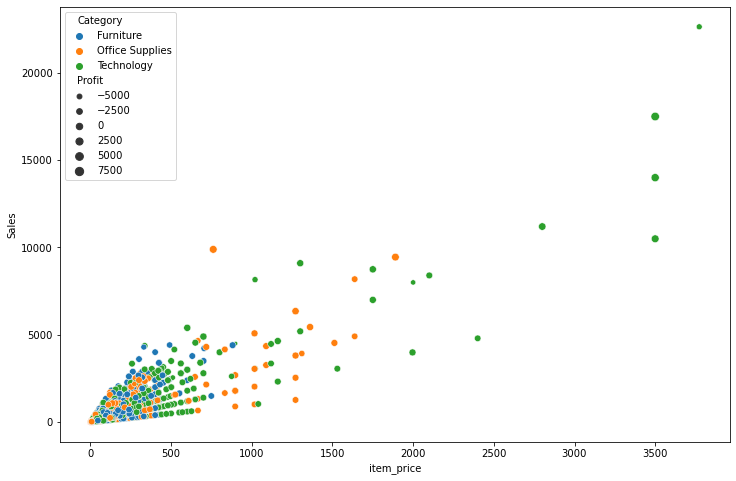

In [80]:
#Now Profit column. Correlation strength of this column with target column is very high so we need can exploit this column for further infomation about target column
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='item_price',y='Sales',hue='Category',size='Profit',data=df)



In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Row ID         9994 non-null   int64   
 1   Order ID       9994 non-null   object  
 2   Order Date     9994 non-null   object  
 3   Ship Date      9994 non-null   object  
 4   Ship Mode      9994 non-null   object  
 5   Customer ID    9994 non-null   object  
 6   Customer Name  9994 non-null   object  
 7   Segment        9994 non-null   category
 8   Country        9994 non-null   object  
 9   City           9994 non-null   object  
 10  State          9994 non-null   category
 11  Postal Code    9994 non-null   int64   
 12  Region         9994 non-null   object  
 13  Product ID     9994 non-null   object  
 14  Category       9994 non-null   category
 15  Sub-Category   9994 non-null   object  
 16  Product Name   9994 non-null   object  
 17  Sales          9994 non-null   fl

In [82]:
#Therefore Columns for model training will be¶
att=['Segment','State','Category','item_price',
            'Discount','Profit',
            'Sales']






In [83]:
dat= df[att]
dat.head()

,Segment,State,Category,item_price,Discount,Profit,Sales
0,Consumer,Kentucky,Furniture,130.9800,0.00,41.9136,261.9600
1,Consumer,Kentucky,Furniture,243.9800,0.00,219.5820,731.9400
2,Corporate,California,Office Supplies,7.3100,0.00,6.8714,14.6200
3,Consumer,Florida,Furniture,191.5155,0.45,-383.0310,957.5775
4,Consumer,Florida,Office Supplies,11.1840,0.20,2.5164,22.3680


In [84]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Segment     9994 non-null   category
 1   State       9994 non-null   category
 2   Category    9994 non-null   category
 3   item_price  9994 non-null   float64 
 4   Discount    9994 non-null   float64 
 5   Profit      9994 non-null   float64 
 6   Sales       9994 non-null   float64 
dtypes: category(3), float64(4)
memory usage: 343.4 KB


In [85]:
dat_lab=dat.Sales
dat_dum=pd.get_dummies(dat.iloc[:,0:7])
dat_dum.head()

,item_price,Discount,Profit,Sales,Segment_Consumer,Segment_Corporate,Segment_Home Office,State_Alabama,State_Arizona,State_Arkansas,...,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Category_Furniture,Category_Office Supplies,Category_Technology
0,130.9800,0.00,41.9136,261.9600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,243.9800,0.00,219.5820,731.9400,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,7.3100,0.00,6.8714,14.6200,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,191.5155,0.45,-383.0310,957.5775,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,11.1840,0.20,2.5164,22.3680,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
dat_dum['Sales']=dat_lab

In [87]:

dat_dum.shape

(9994, 59)

In [94]:
#Lets apply ML algorithms
train,test = train_test_split(dat_dum,test_size=0.20,random_state=2019)

In [95]:
train.shape , test.shape

((7995, 59), (1999, 59))

In [96]:
train_label=train['Sales']
test_label=test['Sales']
del train['Sales']
del test['Sales']

In [97]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [98]:
lr.fit(train,train_label)

LinearRegression()

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
predict_lr=lr.predict(test)


In [101]:
mse=mean_squared_error(test_label,predict_lr)

In [102]:
lr_score=np.sqrt(mse)

In [103]:
lr_score

370.54718484037255

### Cross Val for Linear Regression

In [104]:
from sklearn.model_selection import cross_val_score

In [106]:
score=cross_val_score(lr,train,train_label,cv=10,scoring='neg_mean_squared_error')

In [107]:
lr_score_cross=np.sqrt(-score)

In [108]:
np.mean(lr_score_cross),np.std(lr_score_cross)


(260.3153927582549, 42.049269627744756)

# Exploratory Data Analysis 

In [4]:
#Observation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

- The total number of non null count is a 9,994, which matches the number of row. Therefore, there are no missing values.


In [5]:
#Analyzing the numerical attributes
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#Check to see if we have any columns with null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
#Check the shape of the data frame
df.shape

(9994, 21)

In [8]:
#Check the unique values in each column
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [9]:
#Cleaning up the data by changing the format of date column 
df['Order Date']= df['Order Date'].str.replace('/','-')
df['Ship Date']= df['Ship Date'].str.replace('/','-')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-8-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-8-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6-12-2016,6-16-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
#Cleaning up the data by changing the format of date column 
df.rename(columns={'Order Date': 'Order_date'},inplace=True)
df.rename(columns={'Ship Date': 'Ship_date'},inplace=True)
df.head()

,Row ID,Order ID,Order_date,Ship_date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-8-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-8-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6-12-2016,6-16-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
#Print the maximum an minimum of the order and ship date columns to see the range of date this data covers
print(df['Order_date'].max())
print(df['Order_date'].min())
print(df['Ship_date'].max())
print(df['Ship_date'].min())

#Our data is taken from Jan 2015 to Sep 2017
#add metadata

9-9-2017
1-1-2017
9-9-2017
1-1-2015


In [12]:
df.dtypes

Row ID             int64
Order ID          object
Order_date        object
Ship_date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [13]:
#Calling out all columns in dataset
df.columns

Index(['Row ID', 'Order ID', 'Order_date', 'Ship_date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
#Now change the 'Order_date' and 'Ship_date' dtype to datetime64[ns]
df['Order_date']= pd.to_datetime(df.Order_date)
df['Ship_date']= pd.to_datetime(df.Ship_date)
df.dtypes

Row ID                    int64
Order ID                 object
Order_date       datetime64[ns]
Ship_date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

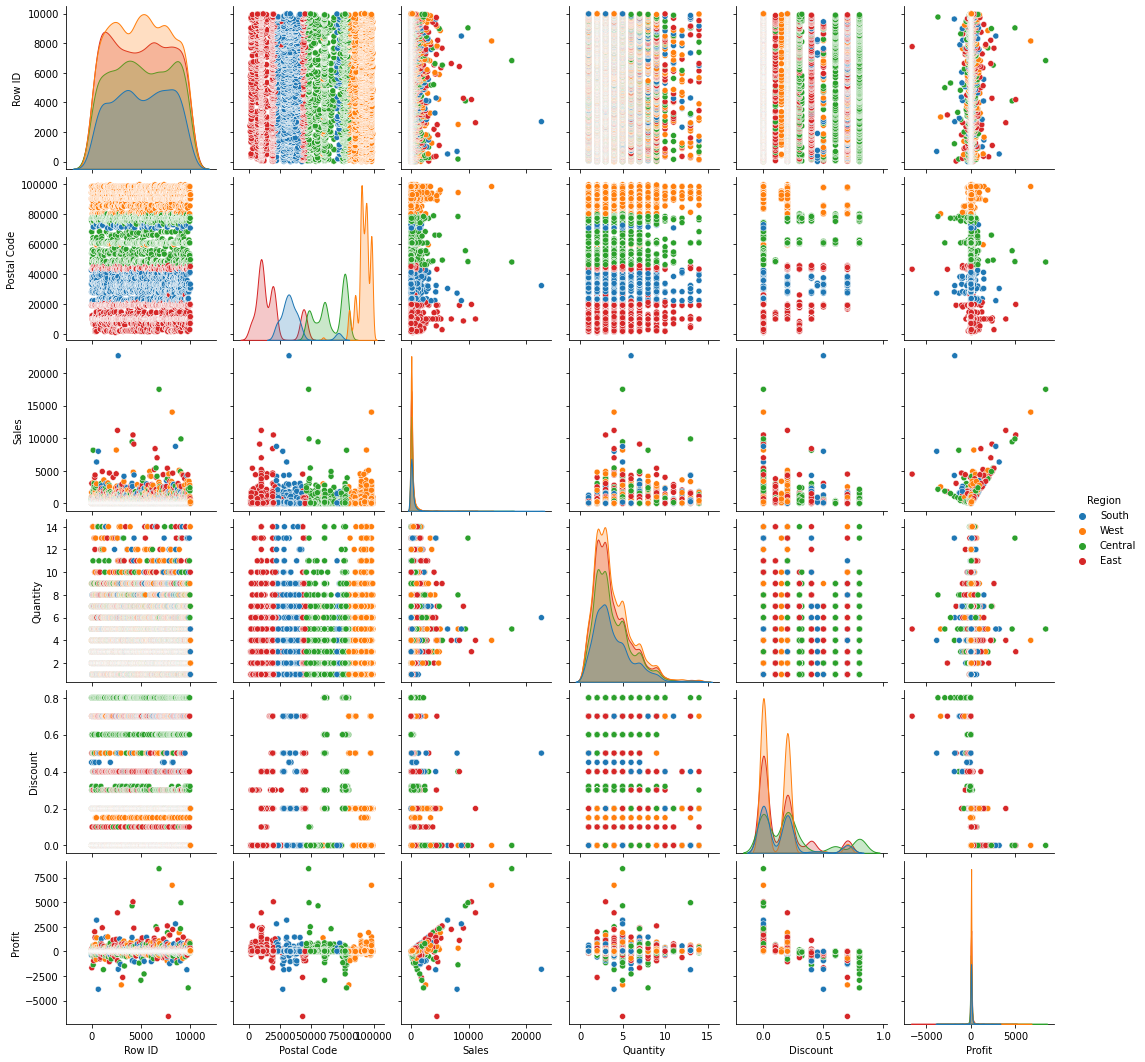

In [15]:
#Pairplot of the sales data
sns.pairplot(df,hue='Region')

# Observation of Pairplot

- In above we see that there is some relation between sales and profit and also there is some relation between Discount and Profit. 
- Now To see what exact relation between those entities we plot the heat_map. so we get more clearity.

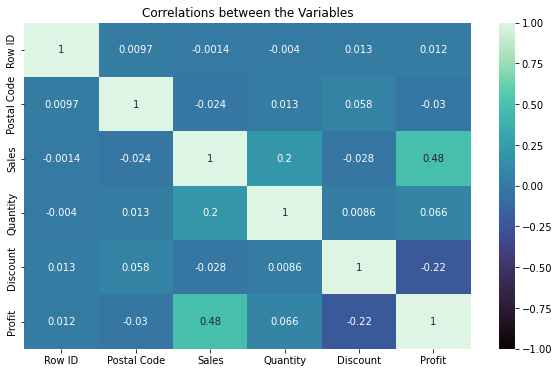

In [16]:
#Heatmap of the Sales data
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlations between the Variables')
plt.show()

# Observation of Heatmap
From Above map we infer that, 
- There is a postive correlation with sales and profits.
- Discount and profit have a negative correlation.
- Quantity and Profit are less moderately correlated.



# Sales Across the United States

- Suppose we are hired by this Superstore. Our employers are curious to understand the average Sales across different Regions. We will address the request by creating a bar plot because we have 'Regions' as your categorical feature and 'Sales' will be our numerical feature.

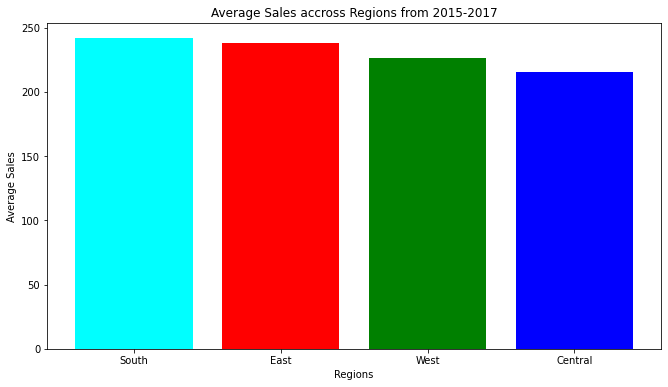

In [17]:
#Lets start by creating a subset of our dataframe therefore its easier to work with our target variables.
df_salereg = df[['Region','Sales']] 
df_salereg = df_salereg.groupby('Region').mean().sort_values(by='Sales', ascending=False)

fig, ax = plt.subplots(figsize=(11,6))
ax.bar(df_salereg.index,df_salereg.Sales, color=['cyan', 'red', 'green', 'blue'])
ax.set_xlabel('Regions')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales accross Regions from 2015-2017')
plt.show()

- After close inspection, we can conclude that Sales/Revenue on average tend to be highest in the South Region and
lowest in the Central Region.

In [18]:
#Average for revenue/sales for region wise
df_avg= df.groupby("Region")["Sales"].mean()
df_avg

Region
Central    215.772661
East       238.336110
South      241.803645
West       226.493233
Name: Sales, dtype: float64

# Linechart for average sales overtime

- Our employers are now trying to track their progress overtime. They want to learn about the trend of their average Sales and Profit over the years they have been open. We will show this trend on a line chart as this will be the best plot to display a trend over the years for both Sales and Profit on the same plot.

In [19]:
#Average Sales and Profit subset of dataframe
df_trend = df[['Order_date','Sales','Profit']].sort_values('Order_date') # Chronological Ordering
df_trend = df_trend.groupby('Order_date').mean() # Groupby to get the average Sales and Profit on each day
df_trend.head()

,Sales,Profit
Order_date,,
2014-01-03,16.448000,5.551200
2014-01-04,96.020000,-21.996700
2014-01-05,19.536000,4.884000
2014-01-06,489.677778,150.894711
2014-01-07,43.579000,-35.981050


In [20]:
#Define a function called plot_trend incase we need a similar plot later to plot a linechart
def plot_trend(axes, x, y, color, xlabel, ylabel):

  #Plot the inputs x,y in the provided color
  axes.plot(x,y, color= color)

  #Set the x-axis label
  axes.set_xlabel(xlabel)

  #Set the y-axis label
  axes.set_ylabel(ylabel,color=color)
  #Set the colors tick params for y-axis
  axes.tick_params('y', colors= color)

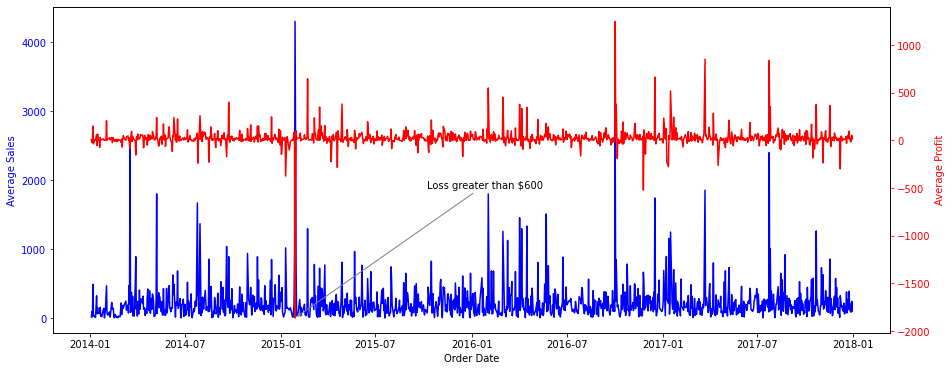

In [21]:
fig, ax = plt.subplots(figsize=(15,6))

#Plot
plot_trend(ax,df_trend.index,df_trend.Sales, "blue",'Order Date','Average Sales')

#Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

#Plot the relative Profit data in red
plot_trend(ax2,df_trend.index,df_trend.Profit, "red",'Order Date','Average Profit')

ax2.annotate("Loss greater than $600",
xy=(pd.Timestamp('2015-01-28'),-1862.3124),xytext=(pd.Timestamp('2015-10-07'),-500),arrowprops={'arrowstyle': '->', 'color': 'gray'})
plt.show()

# Observation on the linechart
- looks like there is a point where the average loss is greater 600 and we would like to point it out on our graph.
- lets find out the date where the avg profit is less than 600 as it can be crucial information to avoid loss in the future.
- Order_date : 2015-01-28. Now lets point out this information on our graph.
- normally you would assume that with greater sales we would expect greater profit.
- There can be a bunch of reasons as to why that is for example that transcation can be where we offered the most discount resulting in loss.
- Our employers can greatly benefit from this observation to make important business decisions in the future.


# Sub-category transactions for all products

Text(0.5, 1.0, 'Sub-category transaction count')

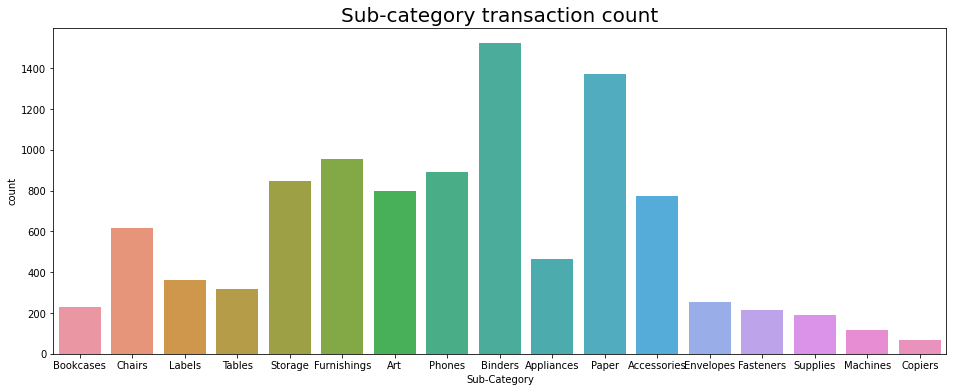

In [22]:
plt.figure(figsize=(16,6))
sns.countplot(df['Sub-Category'])
plt.title('Sub-category transaction count',fontsize=20)

In [23]:
#How much each sub-category brought in revenue, rounded to 1 decimal point
dfsub = df.groupby(["Sub-Category"]).sum().sort_values("Sales", ascending=False).head(20) 
dfsub = dfsub[["Sales"]].round(1) 
dfsub.reset_index(inplace=True) 
dfsub

,Sub-Category,Sales
0,Phones,330007.1
1,Chairs,328449.1
2,Storage,223843.6
3,Tables,206965.5
4,Binders,203412.7
5,Machines,189238.6
6,Accessories,167380.3
7,Copiers,149528.0
8,Bookcases,114880.0
9,Appliances,107532.2


# Observations from the 'Sub-Category transaction' plot above
- Top item sold are binder, followed by papers.
- The two items that are sold the least, copiers and machines.
- Top gross selling items are phones and chairs.
- The items that are sold the least are labels and fasteners.


In [24]:
#Proportions of the sub-category being sold
df['Sub-Category'].value_counts(normalize=True)

#Binders are the top product being sold around 15% of the total orders

Binders        0.152391
Paper          0.137082
Furnishings    0.095757
Phones         0.088953
Storage        0.084651
Art            0.079648
Accessories    0.077547
Chairs         0.061737
Appliances     0.046628
Labels         0.036422
Tables         0.031919
Envelopes      0.025415
Bookcases      0.022814
Fasteners      0.021713
Supplies       0.019011
Machines       0.011507
Copiers        0.006804
Name: Sub-Category, dtype: float64

# Number of customers in selected regions


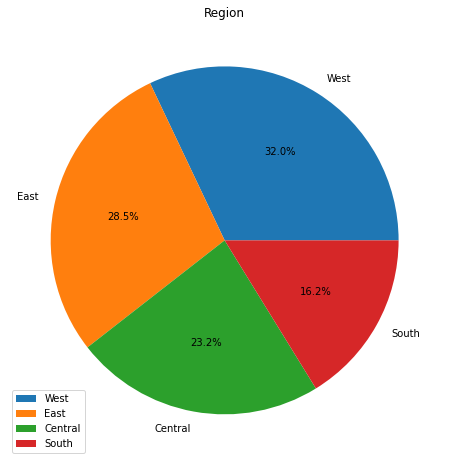

In [25]:
#Number of customers in selected regions
plt.figure(figsize=(8,8))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.legend()
plt.show()

- West has 32% of the entire country transactions, which is the highest among all regions. 
The tells us that our primary customer base is in the West.
- The least amount of transaction is in the South, at 16.2%. 

# Countplot to compare Categories and Regions in United States

<AxesSubplot:xlabel='Category', ylabel='count'>

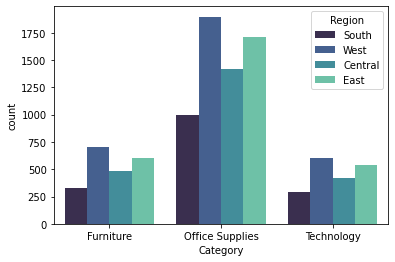

In [26]:
#let's plot some graphs for better undertsanding and visualization
sns.countplot(data = df , x = 'Category' , hue = 'Region'  , palette = 'mako')

- The western regions selling the most in all three categories. 
- We will need to know if all cities in the west coast sell more than the other regions.

# Top 20 states with the highest gross sale & profit

In [27]:
#lets review sales by state, on the second line we are rounding to 1 decimal point
#States sales are listed in the descending order

dfstate = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(20) 
dfstate = dfstate[["Sales"]].round(1) 
dfstate.reset_index(inplace=True) 
dfstate 

,State,Sales
0,California,457687.6
1,New York,310876.3
2,Texas,170188.0
3,Washington,138641.3
4,Pennsylvania,116511.9
5,Florida,89473.7
6,Illinois,80166.1
7,Ohio,78258.1
8,Michigan,76269.6
9,Virginia,70636.7


In [28]:
#Most ordered item per city
df["City"].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [29]:
#City min order
df["City"].value_counts().min()

1

In [30]:
#City max order
df["City"].value_counts().max()

915

- At 10 percent discount, profit margins are good. 
- When Superstore gives out 45 percent, the profit margins drastically drop.


# Sales by states

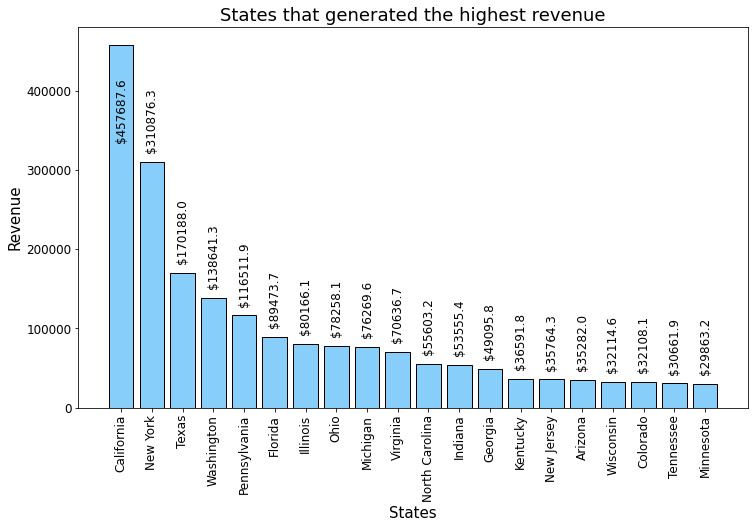

In [31]:
#Plotting the sales by state table

plt.figure(figsize = (12,7)) # width and height of figure is defined in inches
plt.title("States that generated the highest revenue", fontsize=18) 
plt.bar(dfstate["State"], dfstate["Sales"],color= '#87CEFA',edgecolor='black', linewidth = 1)
plt.xlabel("States",fontsize=15) # x axis shows the States
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in dfstate["Sales"].items(): #To show the exact revenue generated on the figure
    if v>400000:
        plt.text(k,v-120000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

Text(0.5, 1.0, 'Transactions For 50 States')

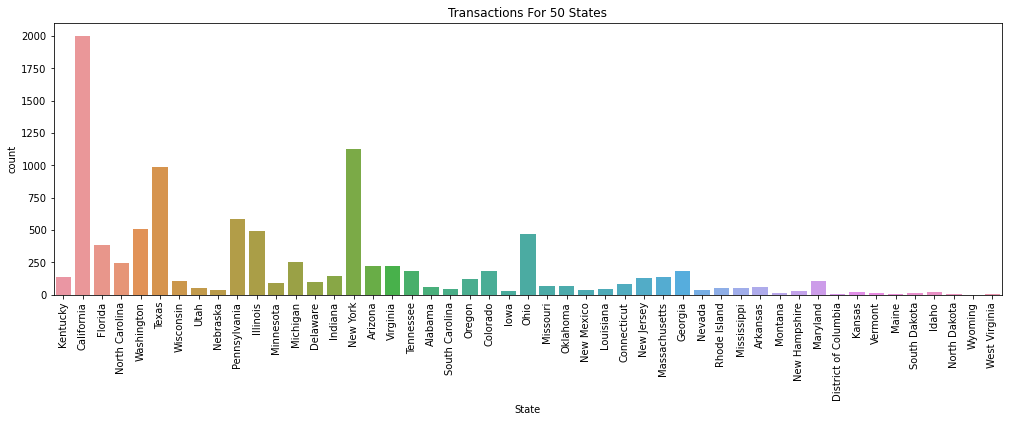

In [32]:
#Top transactions for 50 states
plt.figure(figsize=(17,5))
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.title('Transactions For 50 States')

- You can see a pattern of gross sales with thw number of transactions. 
- We should be concern with the states with low transactions and sales.


# Ship mode in each region

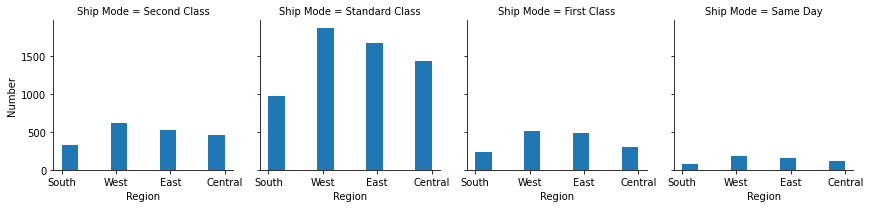

In [33]:
#we will visualize the region column from ship mode 
region_hist = sns.FacetGrid(df, col='Ship Mode', palette='rainbow')
region_hist.map(plt.hist, 'Region')
region_hist.set_ylabels('Number')

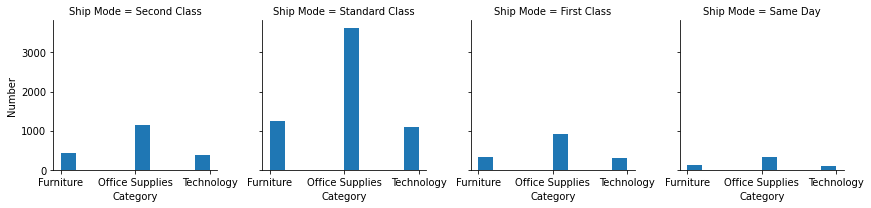

In [34]:
#We will visualize the category column for the ship mode 
category_hist = sns.FacetGrid(df, col='Ship Mode', palette='rainbow')
category_hist.map(plt.hist, 'Category')
category_hist.set_ylabels('Number')

- Standard shipping has the most orders for prefered shipping.
- Same day and first class has the lowest standard for shipping, is an area of concern

# Sales prediction(ML section)


### Linear regression

In [109]:
#Lets see correlation b/w target and features
corr_matrix=df.corr()
corr_matrix['Sales']

Row ID        -0.001359
Postal Code   -0.023854
Sales          1.000000
Quantity       0.200795
Discount      -0.028190
Profit         0.479064
item_price     0.889376
Name: Sales, dtype: float64

In [110]:
df.Category=df.Category.astype('category')
df.State=df.State.astype('category')
df.Segment=df.Segment.astype('category')

In [ ]:
#Columns for model training will be
att=['Segment','State','Category','item_price',
            'Discount','Profit',
            'Sales']



In [111]:
dat= df[att]
dat.head()

,Segment,State,Category,item_price,Discount,Profit,Sales
0,Consumer,Kentucky,Furniture,130.9800,0.00,41.9136,261.9600
1,Consumer,Kentucky,Furniture,243.9800,0.00,219.5820,731.9400
2,Corporate,California,Office Supplies,7.3100,0.00,6.8714,14.6200
3,Consumer,Florida,Furniture,191.5155,0.45,-383.0310,957.5775
4,Consumer,Florida,Office Supplies,11.1840,0.20,2.5164,22.3680


In [112]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Segment     9994 non-null   category
 1   State       9994 non-null   category
 2   Category    9994 non-null   category
 3   item_price  9994 non-null   float64 
 4   Discount    9994 non-null   float64 
 5   Profit      9994 non-null   float64 
 6   Sales       9994 non-null   float64 
dtypes: category(3), float64(4)
memory usage: 343.4 KB


In [113]:
dat_lab=dat.Sales
dat_dum=pd.get_dummies(dat.iloc[:,0:7])
dat_dum.head()

,item_price,Discount,Profit,Sales,Segment_Consumer,Segment_Corporate,Segment_Home Office,State_Alabama,State_Arizona,State_Arkansas,...,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Category_Furniture,Category_Office Supplies,Category_Technology
0,130.9800,0.00,41.9136,261.9600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,243.9800,0.00,219.5820,731.9400,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,7.3100,0.00,6.8714,14.6200,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,191.5155,0.45,-383.0310,957.5775,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,11.1840,0.20,2.5164,22.3680,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [114]:
dat_dum['Sales']=dat_lab

In [115]:
dat_dum.shape

(9994, 59)

In [116]:
#Lets apply ML algorithms
train,test = train_test_split(dat_dum,test_size=0.20,random_state=2019)

In [117]:
train.shape , test.shape

((7995, 59), (1999, 59))

In [118]:
train_label=train['Sales']
test_label=test['Sales']
del train['Sales']
del test['Sales']

In [119]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [120]:
lr.fit(train,train_label)

LinearRegression()

In [121]:
from sklearn.metrics import mean_squared_error

In [122]:
predict_lr=lr.predict(test)

In [123]:
mse=mean_squared_error(test_label,predict_lr)

In [124]:
lr_score=np.sqrt(mse)

In [125]:
lr_score

370.54718484037255

### Result interpretation

### Cross Val for Linear Regression

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
score=cross_val_score(lr,train,train_label,cv=10,scoring='neg_mean_squared_error')

In [128]:
lr_score_cross=np.sqrt(-score)

In [129]:
np.mean(lr_score_cross),np.std(lr_score_cross)



(260.3153927582549, 42.049269627744756)

### Hidden layer neural network

In [ ]:
#Data has a good number of categorical columns here 
#First thing we need to do is remove columns that we are not going to use.
#Make a model that makes predictions regardless of which customer is buying it.
#Take any purchase of a product,see where its coming from/make a prediction based on that regardless of which customer is buying it because there is some overlap bw customers.
#Then we convert our date columns into seperate numerical columns in "encode_dates" function.
#Now we are left with all categorical columns that are not encoded, no numerical columns left.
#In order to move onto the next step we first have to figure out which type of categorical columns there are
#Okay,looking at the columns, we dont have any binary columns
#Checking for any ordering in the categorical columns we find that there isnt any order
#Lets take a look at the 'Ship Mode' column now 
#we can include prefix so we know where each of these column is originaly coming from 
#pd.get_dummies(X['Ship Mode'], prefix='Ship Mode')
#Now define the function 'onehot_encode'
#After we onehot_encode all of our categorical columns we should be almost ready to go as all our columns will now be numeric,3000 different columns
#last thing to do is scale the data
#last thing to do is scale the data
#mean and std are all over the place which can confuse some models especially neural network

#logistic regression 
#linear regression

### Preprocessing

In [38]:
#Define a function to encode the dates for a given df and a column
def encode_dates(df,column):
    df= df.copy()
    df[column]=pd.to_datetime(df[column])
    
    #now we will create seperate columns for Year,Month and day to get numerical columns
    df[column + '_Year']= df[column].apply(lambda x:x.year)
    df[column + '_Month']= df[column].apply(lambda x:x.month)
    df[column + '_Day']= df[column].apply(lambda x:x.day)
    #now since we will have 3 new columns, we will drop the original column
    df= df.drop(column,axis=1)
    
    return df


def onehot_encode(df,column):
    df= df.copy()
    #create the dummies
    dummies= pd.get_dummies(df[column], prefix=column)
    #now concat the original df and dummies side by side
    df= pd.concat([df,dummies],axis=1)
    #and then just drop the original column from which we created the dummies
    df= df.drop(column,axis=1)
    return df

In [39]:
#Start by creating a copy of the dataframe then return the df

def preprocess_inputs(df):
    df= df.copy()
    
    #Drop unnecessary columns
    df= df.drop(['Row ID','Product Name','Country','Customer Name','Quantity','Discount','Profit'],axis=1)
    
    #Drop customer specific feature columns
    df= df.drop(['Order ID','Customer ID'],axis=1)
    
    #Extract date features
    df= encode_dates(df, column= 'Order_date')
    df= encode_dates(df, column= 'Ship_date')
    
    #One_hot encode categorical features
    for column in ['Ship Mode','Segment','City','State','Postal Code','Region','Product ID','Category','Sub-Category']:
        df= onehot_encode(df,column=column)
        
    #Split df into X and y
    y= df['Sales']# what we are trying to predict
    #and everything else in X
    X= df.drop('Sales',axis=1)
    
    #Now we do our Train-test split
    X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,shuffle= True,random_state=1)
    
    
    #Scale X
    scaler= StandardScaler()
    scaler.fit(X_train)
    #transform both X_train and test after fitting it only to train set
    X_train= pd.DataFrame(scaler.transform(X_train),columns=X.columns)
    X_test=  pd.DataFrame(scaler.transform(X_test),columns= X.columns)
    
    
    return X_train,X_test,y_train,y_test
    

In [40]:
X_train,X_test,y_train,y_test= preprocess_inputs(df)

In [41]:
#Get a better sense of this if we create a dict that maps a column name
#To the lentgh of unique values in the column and then mapping the column name to that.
#For every column in X.columns
#{column: len(X[column].unique()) for column in X.columns}

In [42]:
#thi is just 70% of the data and does not contain the sales column
# sales is contained in y_train and y_test
X_train

,Order_date_Year,Order_date_Month,Order_date_Day,Ship_date_Year,Ship_date_Month,Ship_date_Day,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,1.142593,0.354245,-0.628414,1.126475,0.370886,-0.102628,-0.431039,-0.240344,2.041121,-1.21243,...,-0.165734,-0.151031,-0.328414,-0.189709,-0.101981,2.516403,-0.308812,-0.310475,-0.140812,-0.18314
1,0.251872,1.271437,0.740589,0.237119,1.271077,1.368680,-0.431039,-0.240344,-0.489927,0.82479,...,-0.165734,-0.151031,3.044940,-0.189709,-0.101981,-0.397393,-0.308812,-0.310475,-0.140812,-0.18314
2,-1.529569,1.271437,0.398338,-1.541592,1.271077,0.576437,2.319978,-0.240344,-0.489927,-1.21243,...,-0.165734,-0.151031,-0.328414,-0.189709,-0.101981,-0.397393,3.238216,-0.310475,-0.140812,-0.18314
3,1.142593,-2.091600,0.398338,1.126475,-2.029622,0.802792,-0.431039,-0.240344,-0.489927,0.82479,...,6.033773,-0.151031,-0.328414,-0.189709,-0.101981,-0.397393,-0.308812,-0.310475,-0.140812,-0.18314
4,1.142593,0.048515,-1.312915,1.126475,0.070823,-1.008049,2.319978,-0.240344,-0.489927,-1.21243,...,6.033773,-0.151031,-0.328414,-0.189709,-0.101981,-0.397393,-0.308812,-0.310475,-0.140812,-0.18314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,1.142593,0.659976,0.854673,1.126475,0.670950,1.481858,-0.431039,-0.240344,-0.489927,0.82479,...,-0.165734,-0.151031,-0.328414,-0.189709,-0.101981,-0.397393,3.238216,-0.310475,-0.140812,-0.18314
6991,0.251872,-1.785869,-0.172079,0.237119,-1.729558,-0.102628,2.319978,-0.240344,-0.489927,-1.21243,...,-0.165734,-0.151031,3.044940,-0.189709,-0.101981,-0.397393,-0.308812,-0.310475,-0.140812,-0.18314
6992,0.251872,-1.174408,-0.856581,0.237119,-1.129431,-0.442161,-0.431039,-0.240344,-0.489927,0.82479,...,-0.165734,-0.151031,-0.328414,-0.189709,-0.101981,2.516403,-0.308812,-0.310475,-0.140812,-0.18314
6993,-1.529569,0.965707,1.425091,-1.541592,1.271077,-1.687115,-0.431039,-0.240344,2.041121,-1.21243,...,-0.165734,-0.151031,3.044940,-0.189709,-0.101981,-0.397393,-0.308812,-0.310475,-0.140812,-0.18314


In [43]:
#Lets take a look at the 'Ship Mode' column now 
#Since we dont know what class is greater or lesser for ex we dont know if if standard class is greater or lesss than Second class
#We will treat it like a nominal feature like all the others
#X['Ship Mode'].unique()

In [44]:
#last thing to do is scale the data
#Mean and std are all over the place which can confuse some models especially neural network
X_train.describe()

,Order_date_Year,Order_date_Month,Order_date_Day,Ship_date_Year,Ship_date_Month,Ship_date_Day,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
count,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,...,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03,6.995000e+03
mean,6.208386e-14,-4.850381e-17,-9.446816e-17,-9.623664e-14,1.350996e-16,-1.005629e-16,-5.078933e-17,2.945781e-17,-8.608792e-17,-6.094720e-17,...,-6.577218e-17,-1.828416e-17,3.098149e-17,-4.977354e-17,4.875776e-17,-4.875776e-17,-6.094720e-17,6.805770e-17,-1.117365e-17,2.996571e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,...,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.529569e+00,-2.091600e+00,-1.655166e+00,-1.541592e+00,-2.029622e+00,-1.687115e+00,-4.310385e-01,-2.403435e-01,-4.899269e-01,-1.212430e+00,...,-1.657338e-01,-1.510310e-01,-3.284137e-01,-1.897086e-01,-1.019810e-01,-3.973926e-01,-3.088120e-01,-3.104754e-01,-1.408118e-01,-1.831398e-01
25%,-6.388484e-01,-8.686772e-01,-8.565809e-01,-6.522366e-01,-8.293678e-01,-8.948715e-01,-4.310385e-01,-2.403435e-01,-4.899269e-01,-1.212430e+00,...,-1.657338e-01,-1.510310e-01,-3.284137e-01,-1.897086e-01,-1.019810e-01,-3.973926e-01,-3.088120e-01,-3.104754e-01,-1.408118e-01,-1.831398e-01
50%,2.518721e-01,3.542455e-01,5.608769e-02,2.371191e-01,3.708862e-01,1.054922e-02,-4.310385e-01,-2.403435e-01,-4.899269e-01,8.247901e-01,...,-1.657338e-01,-1.510310e-01,-3.284137e-01,-1.897086e-01,-1.019810e-01,-3.973926e-01,-3.088120e-01,-3.104754e-01,-1.408118e-01,-1.831398e-01
75%,1.142593e+00,9.657068e-01,8.546727e-01,1.126475e+00,9.710133e-01,9.159700e-01,-4.310385e-01,-2.403435e-01,-4.899269e-01,8.247901e-01,...,-1.657338e-01,-1.510310e-01,-3.284137e-01,-1.897086e-01,-1.019810e-01,-3.973926e-01,-3.088120e-01,-3.104754e-01,-1.408118e-01,-1.831398e-01
max,1.142593e+00,1.271437e+00,1.767341e+00,2.015831e+00,1.271077e+00,1.708213e+00,2.319978e+00,4.160711e+00,2.041121e+00,8.247901e-01,...,6.033773e+00,6.621159e+00,3.044940e+00,5.271244e+00,9.805752e+00,2.516403e+00,3.238216e+00,3.220867e+00,7.101678e+00,5.460309e+00


In [45]:
#Sales is contained in y_train and y_test
#Test set contains the other 30% of the data
y_train

1963     24.900
9348    842.720
8795    211.168
9389      2.040
5090      8.784
         ...   
2895     35.880
7813     10.560
905      12.960
5192    397.600
235     617.976
Name: Sales, Length: 6995, dtype: float64

i

### Training

In [46]:
#Create a 2 hidden layer neural network
#We will play around with the number of neurons in each layer but first,
#Shape : size of the feature vector going into the input
inputs= tf.keras.Input(shape=(X_train.shape[1],))
#Crate our two dense layers
x= tf.keras.layers.Dense(1024,activation='relu')(inputs)
x= tf.keras.layers.Dense(1024,activation='relu')(x)
#For our outputs, also our dense layer,passing 1 value(predicted sale/price)
outputs= tf.keras.layers.Dense(1,activation='linear')(x)

#Create our model
model= tf.keras.Model(inputs=inputs,outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3110)]            0         
                                                                 
 dense (Dense)               (None, 1024)              3185664   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4,236,289
Trainable params: 4,236,289
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
#Compile the model
model.compile(
    optimizer='adam',
    loss='mse'
        
)

#Fit the model and store it in history
history= model.fit(
    X_train,
    y_train,
    validation_split= 0.2,
    batch_size= 32,
    epochs=100,#large because we use the callback function
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience= 5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau()#helps the model converge easily,when it notices val_loss not improving it will reduce the learning rate
    ]
)

Epoch 1/100
175/175 [==============================] - 7s 37ms/step - loss: 405660.4688 - val_loss: 165864.5156 - lr: 0.0010
Epoch 2/100
175/175 [==============================] - 6s 33ms/step - loss: 308477.6562 - val_loss: 204106.1562 - lr: 0.0010
Epoch 3/100
175/175 [==============================] - 6s 34ms/step - loss: 216693.6094 - val_loss: 1003896.3125 - lr: 0.0010
Epoch 4/100
175/175 [==============================] - 6s 35ms/step - loss: 150745.5156 - val_loss: 2710574.7500 - lr: 0.0010
Epoch 5/100
175/175 [==============================] - 6s 33ms/step - loss: 81300.5234 - val_loss: 6210367.0000 - lr: 0.0010
Epoch 6/100
175/175 [==============================] - 5s 30ms/step - loss: 57824.9766 - val_loss: 9073082.0000 - lr: 0.0010


### Results

In [48]:
#RESULTS
test_loss= model.evaluate(X_test,y_test,verbose=0)

print('test loss: {:.5f}'.format(test_loss))

test loss: 277178.46875


### We used mean squared error as our loss function. The test loss value of 277178.46875 is relatively a very high value which indicates that we need to try and build a different model,most likely using a different method than

In [131]:
y_pred= np.squeeze(model.predict(X_test))

test_r2= r2_score(y_test,y_pred)

print('Test R2 score: {:.5f}'.format(test_r2))

NameError: name 'model' is not defined

### We used mean squared error as our loss function. The test loss value of 277178.46875 is relatively a very high value,in an ideal model the lower the MSE the higher the accuracy of prediction as there would be excellent match between the actual and predicted data set.
### The R^2 value of 0.25161  is not a good result as ideally it should be as close to 1 as possible or atleast higher than 0.9 to rely on our model.
### These results indicate that we need to try and build a different model most likely using a different method to accurately predict sales as we already tried changing the parameters to get better results.


# Conclusion
- Western region is where the vast majority of the supplies are purchased 
- Southern region has the the lowest number of orders are sells. 
- Superstore should provide more discounts and more online stores for consumers in the south.  
- Office supplies have the mores orders in category
- Binders have the most orders in the Subcategory from office supplies
- Technology has the least about of orders sold. The Superstore could improve inventory and offer discounts and promotions to increase sales in all regions




# Work Cited

- Dataset/ Author Vivek Chowdhury

https://www.kaggle.com/datasets/vivek468/superstore-dataset-final